In [137]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#데이터 시각화 + 패키지
import seaborn as sns
#통계 분석 패키지
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
#그래프 표시
%matplotlib inline
#선형 회귀분석모델 formula(y ~ X1 + X2 +)
import statsmodels.formula.api as smf
#회귀분석의 정규성 확인
from statsmodels.api import qqplot,add_constant
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#학습용과 평가용 데이터 분리
from sklearn.model_selection import train_test_split
#선형회귀모형 
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
#평가함수
from sklearn.metrics import r2_score

matplotlib.rc('font',family = 'Noto sans CJK JP')
#음수 표시
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline

In [138]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/체질검사.csv",encoding = 'euc-kr')
df_raw.head() # 데이터 불러오기

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [139]:
df_raw.isnull().sum()  # 결측치 확인

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
GENDER     0
dtype: int64

In [140]:
df_raw[['WEIGHT','WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand = True)
df_raw[['HEIGHT','HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand = True)
df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')
df_raw.info() #  수치형 변수인 몸무게와 키 변수 처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


In [141]:
df_raw = df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'], axis = 1)
# 단위를 나타내는 항목 제외

In [142]:
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [143]:
df_raw['WEIGHT'] = df_raw['WEIGHT'] * 0.45
df_raw['HEIGHT'] = df_raw['HEIGHT'] * 2.54
df_raw # 키는 inch단위에서 cm단위로 몸무게는 pound에서 kg으로 변환

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,163.4175,183.515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,75.6000,180.975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,79.9875,173.990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,66.4875,167.005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,98.5500,162.560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,93.3750,177.800,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9,여성
248,23.6,43,76.8375,171.450,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8,남성
249,20.9,35,73.2375,167.640,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9,남성
250,17.0,56,75.4875,173.990,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0,남성


In [144]:
df_raw.drop(df_raw[df_raw["WEIGHT"] >= 160].index, inplace=True)  # 이상치 확인 후 몸무게와 키의 이상치 제거
df_raw.drop(df_raw[df_raw["HEIGHT"] <= 100].index, inplace=True)
df_raw['BMI'] = ((df_raw['WEIGHT']) / (df_raw['HEIGHT']**2)) * 10000
df_raw['GENDER'] = df_raw['GENDER'].replace(1,0).replace(2,1)
df_raw_dummy = pd.get_dummies(df_raw,drop_first = True)
df_raw_dummy.head()
# 범주형 변수인 gender의 dummy 변수화와  키와 몸무게를 이용한 BMI 파생변수 추가

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI,GENDER_여성
1,11.8,27,75.6000,180.975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595,0
2,22.2,69,79.9875,173.990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478,0
3,10.6,57,66.4875,167.005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617,1
4,47.5,51,98.5500,162.560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165,1
5,24.2,40,91.0125,177.800,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,28.789726,0


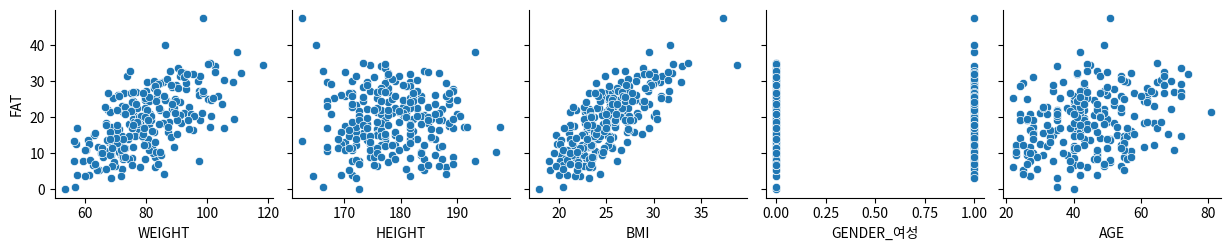

In [145]:
sns.pairplot(df_raw_dummy, y_vars = "FAT", x_vars = ["WEIGHT","HEIGHT","BMI","GENDER_여성","AGE"])
# 몸무게, 키, BMI, 성별과 나이가 FAT에 영향을 줄 것이라 예상하여 산점도를 출력
# 몸무게와 키에 이상치 확인
# 선형을 띄는 것 같은 것은 weight와 bmi가 띄는 것 같다.

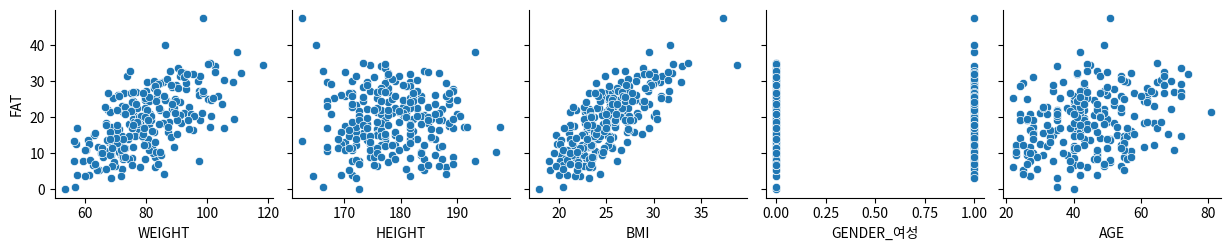

In [146]:
sns.pairplot(df_raw_dummy, y_vars = "FAT", x_vars = ["WEIGHT","HEIGHT","BMI","GENDER_여성","AGE"])

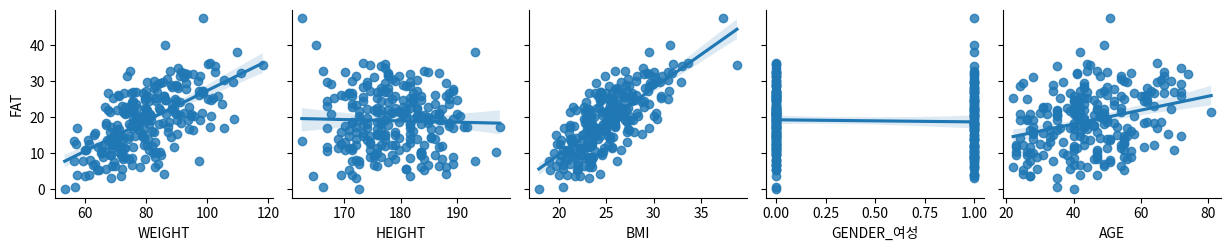

In [147]:
sns.pairplot(df_raw_dummy, y_vars = "FAT", x_vars = ["WEIGHT","HEIGHT","BMI","GENDER_여성","AGE"], kind = "reg")

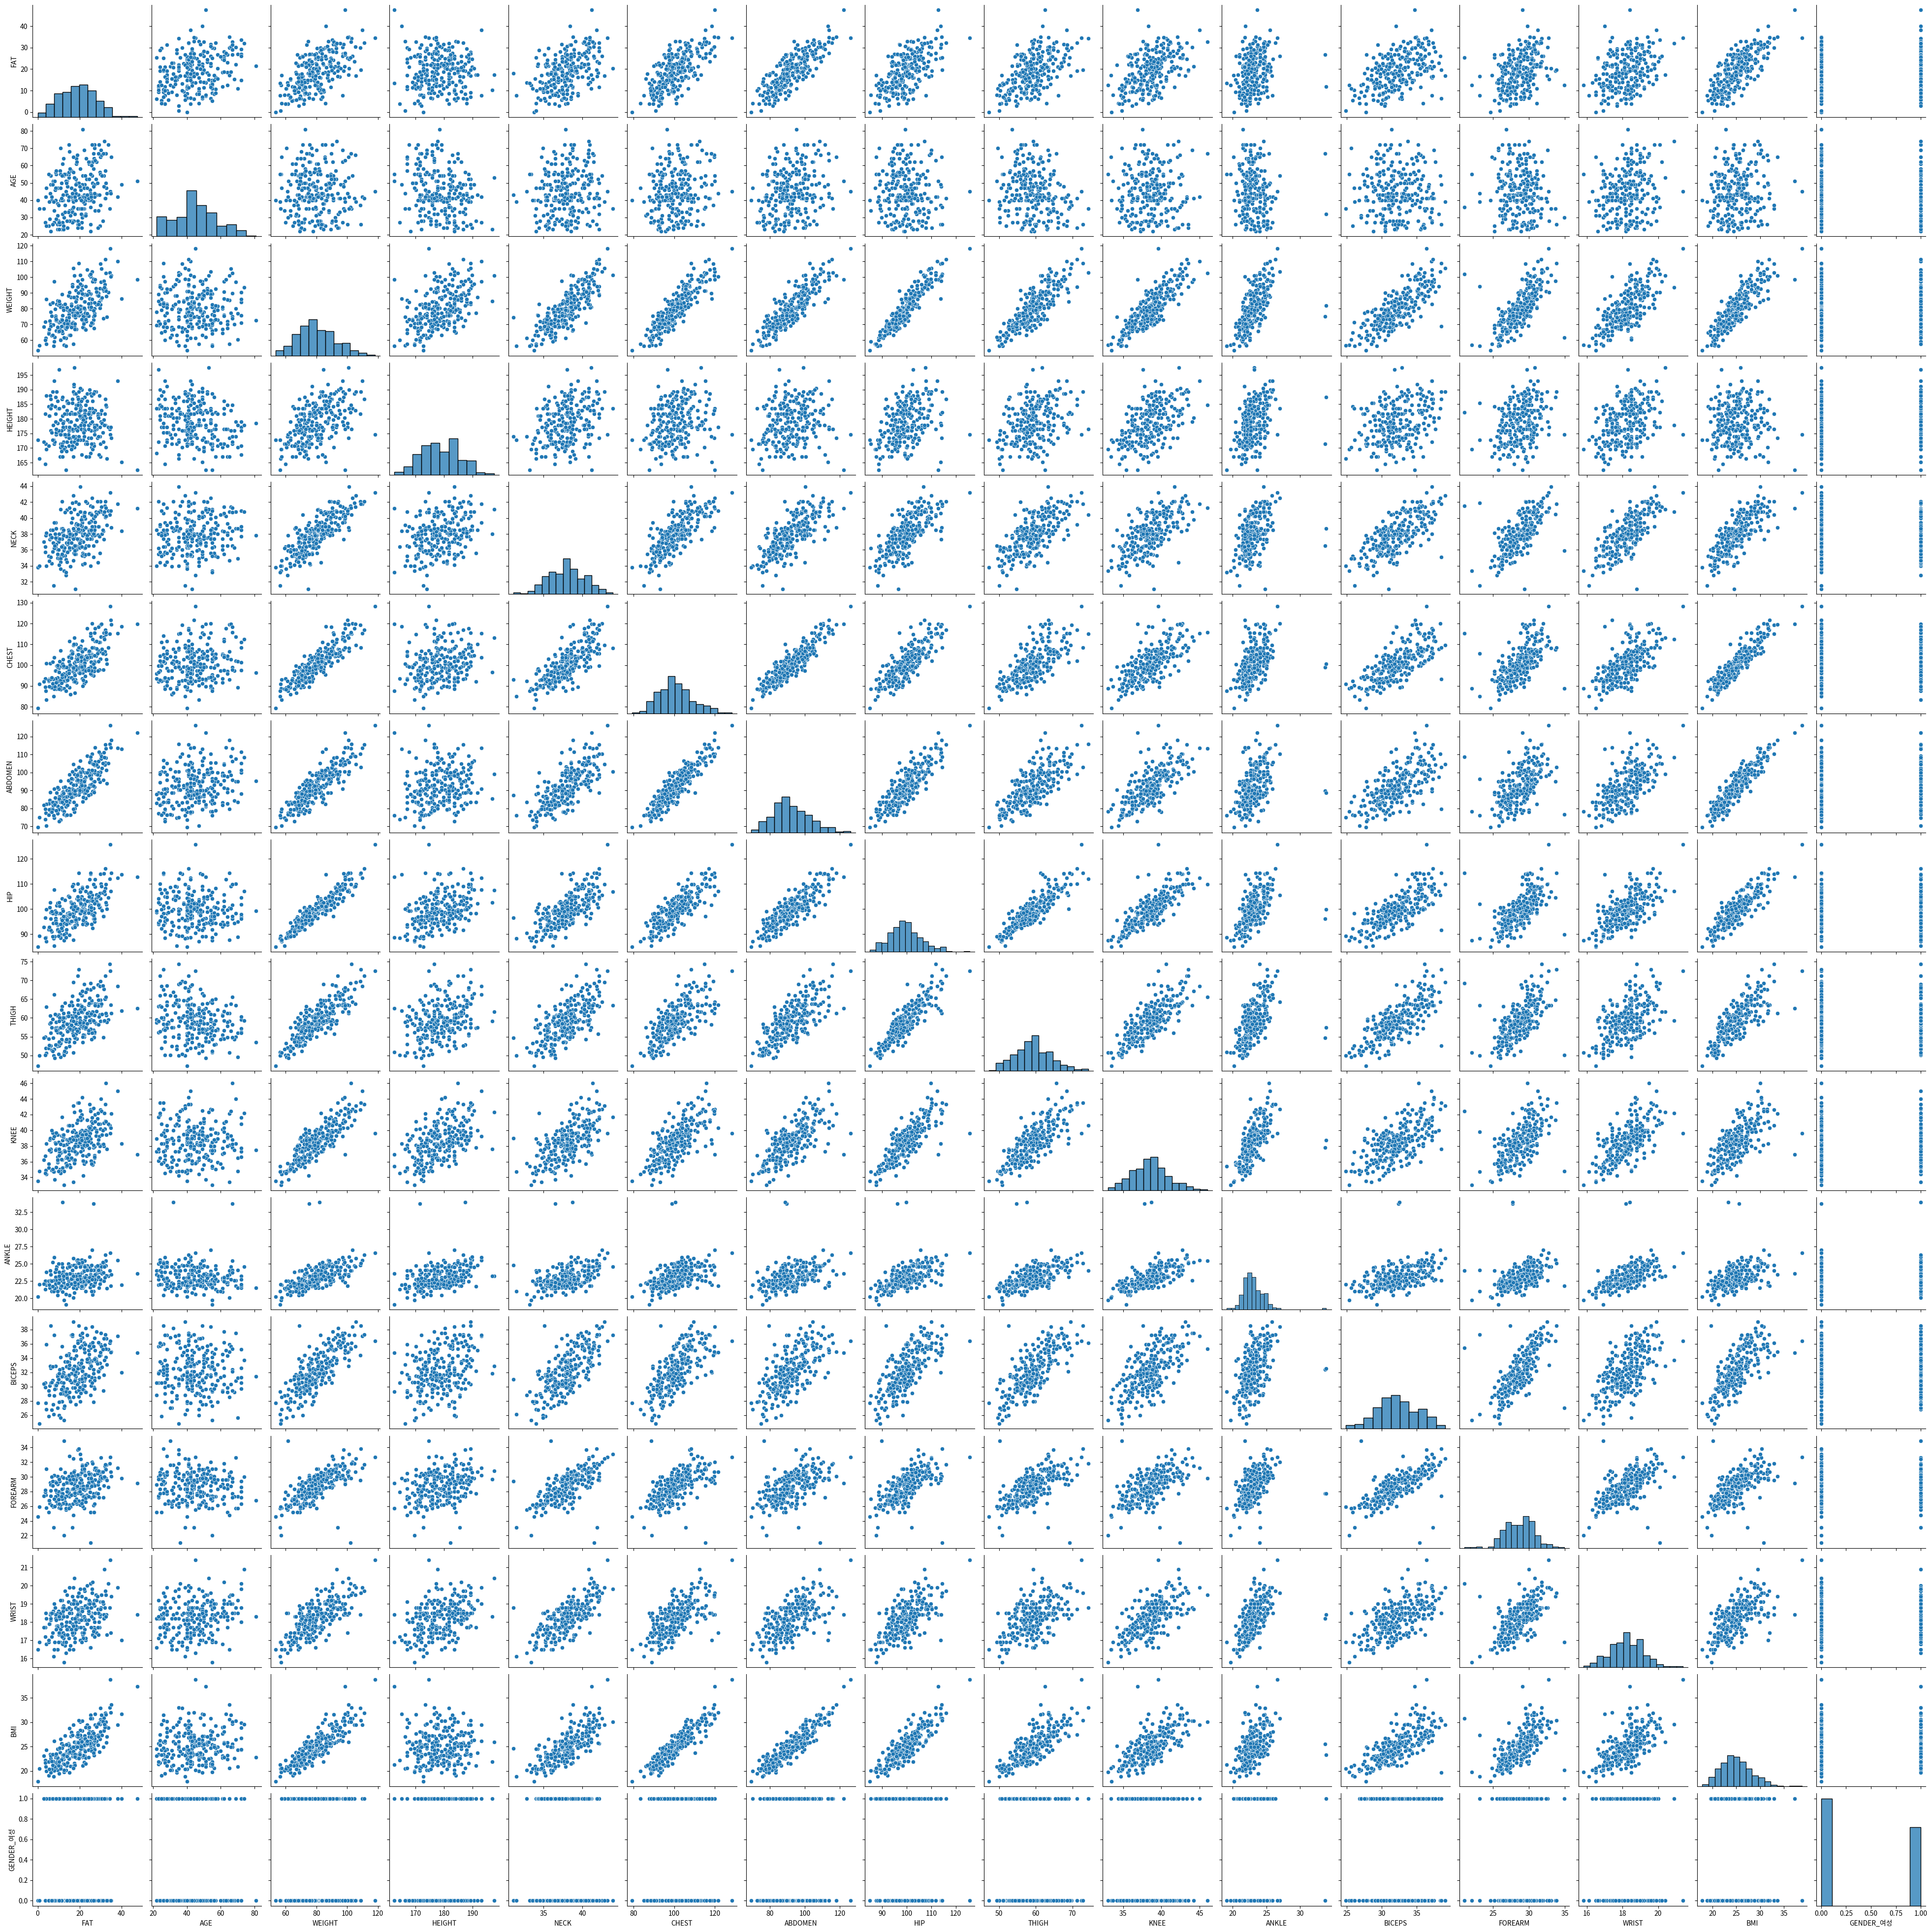

In [148]:
sns.pairplot(df_raw_dummy)

In [149]:
df_raw_dummy.corr().round(3)
# 상관계수의 경우 ABDOMEN과 BMI 그리고 CHEST가 상대적으로 FAT과 강한 상관관계를 띄고 있다.

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI,GENDER_여성
FAT,1.000,0.295,0.617,-0.029,0.489,0.701,0.824,0.633,0.549,0.492,0.245,0.482,0.365,0.339,0.745,-0.035
AGE,0.295,1.000,-0.016,-0.246,0.119,0.182,0.243,-0.058,-0.216,0.017,-0.110,-0.044,-0.085,0.218,0.124,-0.063
WEIGHT,0.617,-0.016,1.000,0.513,0.810,0.891,0.874,0.933,0.852,0.843,0.581,0.785,0.683,0.725,0.867,0.009
HEIGHT,-0.029,-0.246,0.513,1.000,0.325,0.224,0.187,0.397,0.350,0.513,0.395,0.319,0.322,0.397,0.022,0.111
NECK,0.489,0.119,0.810,0.325,1.000,0.769,0.728,0.708,0.669,0.648,0.434,0.709,0.661,0.731,0.752,0.033
CHEST,0.701,0.182,0.891,0.224,0.769,1.000,0.910,0.825,0.708,0.698,0.447,0.707,0.599,0.644,0.911,-0.003
ABDOMEN,0.824,0.243,0.874,0.187,0.728,0.910,1.000,0.861,0.737,0.710,0.407,0.656,0.530,0.602,0.914,-0.005
HIP,0.633,-0.058,0.933,0.397,0.708,0.825,0.861,1.000,0.881,0.809,0.521,0.722,0.603,0.626,0.861,-0.033
THIGH,0.549,-0.216,0.852,0.350,0.669,0.708,0.737,0.881,1.000,0.777,0.504,0.744,0.604,0.544,0.787,-0.034
KNEE,0.492,0.017,0.843,0.513,0.648,0.698,0.710,0.809,0.777,1.000,0.585,0.654,0.579,0.656,0.679,-0.028


In [150]:
df_train,df_test = train_test_split(df_raw_dummy, test_size = 0.4, random_state = 1234)
print("train data size : {}". format(df_train.shape))
print("test data size : {}". format(df_test.shape)) # 이상치 제거로 인한 데이터 수 감소
# train과 test 셋을  0.6:0.4 비율로 분리

train data size : (150, 16)
test data size : (100, 16)


In [151]:
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
                               KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI + GENDER_여성", data = df_train)
# 상수항 자동 추가

In [152]:
reg_result = reg_model.fit()
print(reg_result.summary())
# 회귀 모델 생성

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.06
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           7.67e-35
Time:                        21:32:30   Log-Likelihood:                -422.49
No. Observations:                 150   AIC:                             877.0
Df Residuals:                     134   BIC:                             925.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -95.9338     72.184     -1.329      0.1

In [153]:
df_train_x = df_train.drop('FAT',axis = 1) # 설명변수간 다중공선성 확인
df_train_x_const = add_constant(df_train_x)

In [154]:
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values,i)\
                for i in range(df_train_x_const.shape[1])]
# VIF 정렬 실행

In [155]:
df_vif.sort_values("VIF", ascending = True).round(2)
# WEIGHT 변수가 다중공선성이 의심되어 제거

,variable,VIF
15,GENDER_여성,1.15
12,FOREARM,2.00
10,ANKLE,2.07
1,AGE,2.51
13,WRIST,3.82
11,BICEPS,3.95
9,KNEE,4.98
4,NECK,5.39
8,THIGH,7.77
5,CHEST,14.49


In [156]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
                               KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI + GENDER_여성", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())
# 유의하지 않은 변수 중 p - value가 가장 큰 것을 하나씩 반복적으로 제거

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     30.74
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           3.71e-35
Time:                        21:32:36   Log-Likelihood:                -423.65
No. Observations:                 150   AIC:                             877.3
Df Residuals:                     135   BIC:                             922.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1361     11.901      0.600      0.5

In [157]:
df_train_x = df_train.drop(["FAT", "WEIGHT"], axis = 1)
df_train_x_const= add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values,i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
14,GENDER_여성,1.15
11,FOREARM,1.98
9,ANKLE,2.06
1,AGE,2.51
10,BICEPS,3.78
12,WRIST,3.80
8,KNEE,4.79
3,NECK,5.36
7,THIGH,7.63
2,HEIGHT,7.77


In [217]:
reg_model = smf.ols(formula = "FAT ~  HEIGHT  + ABDOMEN +  \
                                     WRIST"  , data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())
# 73.9%의 설명력을 가지고 있음
# 유의확률 0.05를 넘는 모든 변수 제거

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           4.65e-43
Time:                        22:16:41   Log-Likelihood:                -428.73
No. Observations:                 150   AIC:                             865.5
Df Residuals:                     146   BIC:                             877.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1195      9.760      1.242      0.2

In [218]:
df_train_x = df_train[["HEIGHT", "WRIST", "ABDOMEN"]]
df_train_x_const= add_constant(df_train_x)

In [219]:
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values,i)\
                for i in range(df_train_x_const.shape[1])]

In [220]:
df_vif.sort_values("VIF", inplace = True)
df_vif.round(2)
# BMI같은 경우 다중공선성이 의심되지만 목표변수에 가장 영향이 큰 변수이므로 제거하지 않았음

,variable,VIF
1,HEIGHT,1.31
3,ABDOMEN,1.74
2,WRIST,2.14
0,const,781.88


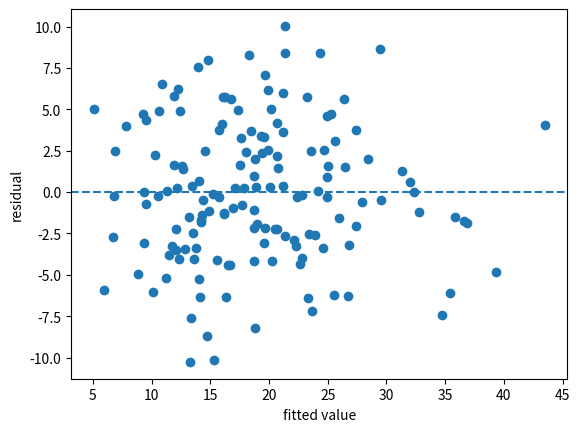

In [221]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")
# 잔차가 y = 0 을 기준으로 Random하게 산포되어 있으므로 등분산성을 만족시켰음

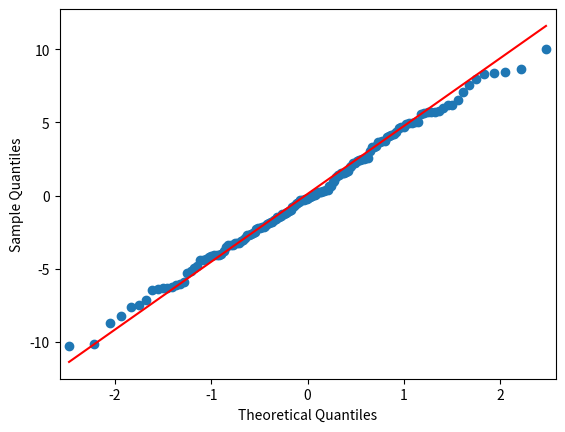

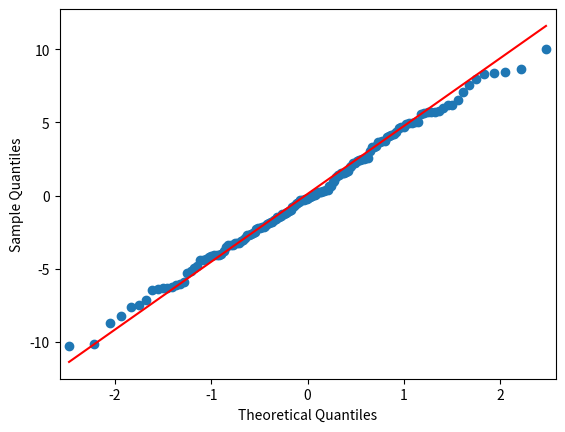

In [222]:
qqplot(reg_result.resid, line = "q")
# 정규분포 직선을 중심으로 분포하므로 정규분포 또한 따르고 있음

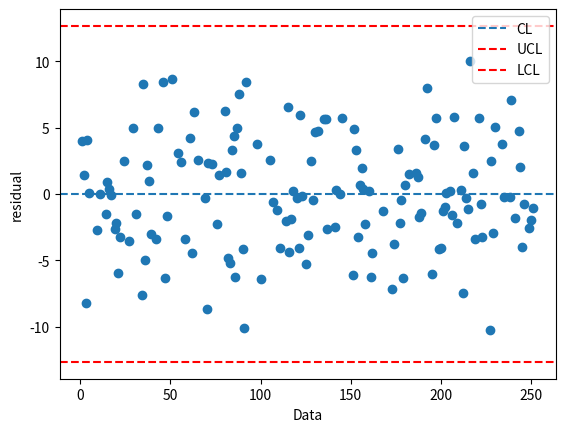

In [223]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data") 
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--",label = 'CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle = "--", color = "red", label = 'UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle = "dashed", color = "red", label = 'LCL')
plt.legend()
# 잔차가 y=0을 기준으로 관리 상하한을 벗어나지 않고 랜덤하게 산포하고 있으므로 독립성 또한 만족시켰음

In [224]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수:", r2_score(df_test['FAT'], test_pred))
# train 데이터의 결정계수는 73.9% test 데이터의 결정계수는 70.4%을 띄고 있음.
# 두 경우 모두 생각보다 높은 값으로 모델이 train과 test에 적합이 어느 정도 되었다는 것을 알 수 있음. 
# 하지만 train 이 더 높아서 overfitting 의심됨
# "HEIGHT", "WRIST", "ABDOMEN"이 fat변수에 있어서 가장 유의미한 결과를 내고 있다. 즉 이 세 변수는 지방에 영향을 미치는 세 가지 요소이다.

train data의 결정계수: 0.7444624758927945
test data의 결정계수: 0.7065786797860634


In [225]:
df_train_y = df_train["FAT"]
df_train_x = df_train.drop('FAT', axis = 1)
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)
selected_cols = df_train_x.columns[rfe.support_]
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['ABDOMEN', 'FOREARM', 'WRIST', 'BMI', 'GENDER_여성'], dtype='object')
Removed Variables : Index(['AGE', 'WEIGHT', 'HEIGHT', 'NECK', 'CHEST', 'HIP', 'THIGH', 'KNEE',
       'ANKLE', 'BICEPS'],
      dtype='object')


In [226]:
rfe_reg_model = smf.ols(formula = "FAT ~ GENDER_여성 + ABDOMEN + FOREARM + WRIST + BMI", data = df_train)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())
# 후진제거법을 이용하여 변수 선택 및 모델 생성 결과
# p -value값이 0.05보다 높은 변수를 선택하고 있어서 좋은 모델이라고 생각되지 않음

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     79.53
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           1.12e-39
Time:                        22:16:57   Log-Likelihood:                -431.69
No. Observations:                 150   AIC:                             875.4
Df Residuals:                     144   BIC:                             893.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.1360      7.742     -0.922      0.3